# JINA demo

The notebook that demonstrate JINA, that is based on [docarray document](https://docarray.jina.ai/fundamentals/notebook-support/).

## Display Document

A cell with a Document object will be pretty-printed with its non-empty field and `id`.

In [1]:
from docarray import Document


d = Document(text="Hello")

In [2]:
d

📄 Document: 17500274f728e442d0c4e231585b74f4
╭────────────────────────────────────────────────┬─────────────────────────────╮
│ Attribute                                      │ Value                       │
├────────────────────────────────────────────────┼─────────────────────────────┤
│ text                                           │ Hello                       │
╰────────────────────────────────────────────────┴─────────────────────────────╯

In [3]:
import numpy as np
from docarray import Document


d = Document(embedding=np.random.random(100))
d.chunks.append(Document(text="children", embedding=np.random.random(100)))
d

📄 Document: bbda592e2d4eb358bb2837988946f1e3
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄                              │
╰───────────┴──────────────────────────────────────────────────────────────────╯
└── 💠 Chunks
    └── 📄 Document: 29498e012323a16ee022fc3ef24a189d
        ╭─────────────┬────────────────────────────────────────────────────────────────╮
        │ Attribute   │ Value                                                          │
        ├─────────────┼────────────────────────────────────────────────────────────────┤
        │ parent_id   │ bbda592e2d4eb358bb2837988946f1e3                               │
        │ granularity │ 1                                                              │
        │ text        │ children                                                       │
        │ embedding   │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
        │             │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄                          │
        ╰─────────────┴────────────────────────────────────────────────────────────────╯

If a Document is nested, then it pretty-prints the nested structure.

### Display rich content
If a Document is an image Document, you can use [`display()`](https://docarray.jina.ai/api/docarray.document.mixins.plot/#docarray.document.mixins.plot.PlotMixin.display) to visualize it.

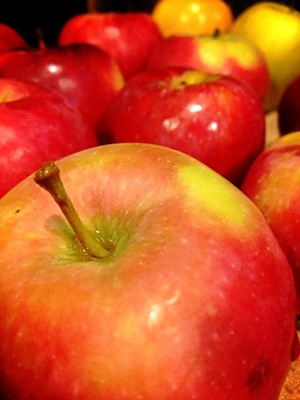

In [4]:
d = Document(uri="samples/example.jpg")
d.display()

Note that it finds `.tensor` or `.uri` for visualization.

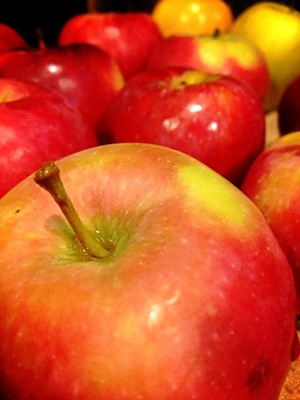

In [5]:
d = Document(uri="samples/example.jpg").load_uri_to_image_tensor()
d.display()

This works even if your Document is not a real image but just a `ndarray` in `.tensor`.

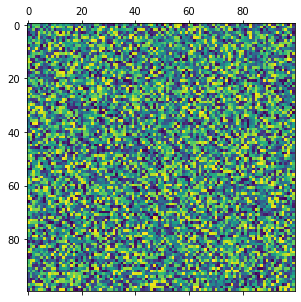

In [6]:
d = Document(tensor=np.random.random((100, 100)))
d.display()

Video and audio Document can be displayed as well, you can play them in the cell.

In [7]:
d = Document(uri="samples/example.mp4")
d.display()

## Display DocumentArray

A cell with a DocumentArray object can be pretty-printed automatically.

In [8]:
from docarray import DocumentArray


DocumentArray.empty(10)

╭──────── Documents Summary ─────────╮
│                                    │
│   Length                 10        │
│   Homogenous Documents   True      │
│   Common Attributes      ('id',)   │
│   Multimodal dataclass   False     │
│                                    │
╰────────────────────────────────────╯
╭───────────────────── Attributes Summary ─────────────────────╮
│                                                              │
│   Attribute   Data type   #Unique values   Has empty value   │
│  ──────────────────────────────────────────────────────────  │
│   id          ('str',)    10               False             │
│                                                              │
╰──────────────────────────────────────────────────────────────╯

### Display image sprite

DocumentArray with all image Documents (image is either in `.uri` or `.tensor`) can be plotted into one sprite image.

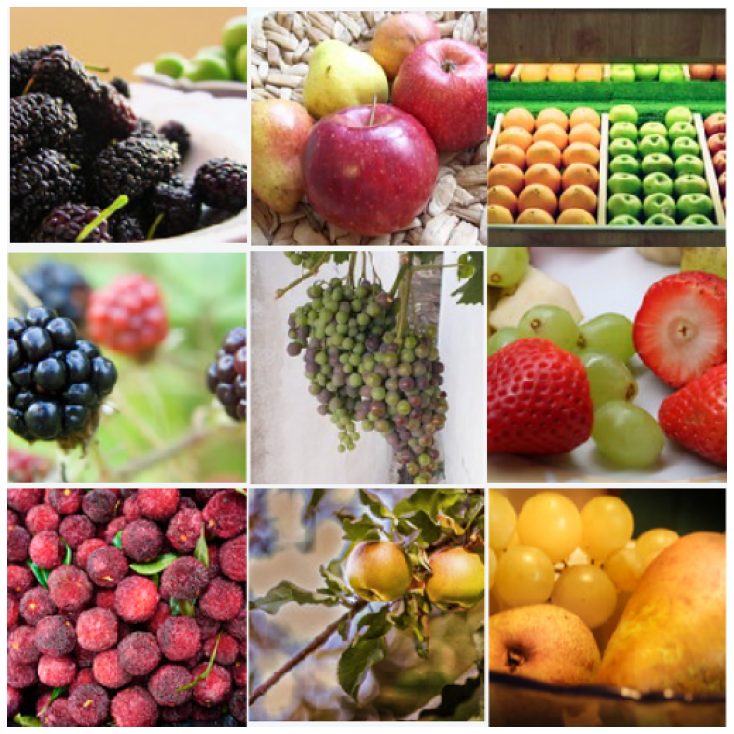

In [9]:
da = DocumentArray.from_files("samples/images/*.PNG")
da.plot_image_sprites()

### Display embeddings

DocumentArray with non-empty `.embeddings` can be visualized interactively via [`plot_embeddings()`](https://docarray.jina.ai/api/docarray.array.mixins.plot/#docarray.array.mixins.plot.PlotMixin.plot_embeddings).

In [ ]:
da = DocumentArray.empty(1000)
da.embeddings = np.random.random([len(da), 10])
da.plot_embeddings(port=8080)

/home/studio-lab-user/.conda/envs/jina/lib/python3.9/site-packages/docarray/array/mixins/plot.py:276: UserWarning: Showing iframe in cell, you may want to open http://127.0.0.1:8080/static/index.html?config=config.json in a new tab for better experience. Also, `localhost` may need to be changed to the IP address if your jupyter is running remotely. Click "stop" button in the toolbar to move to the next cell.
  warnings.warn(
